<a href="https://colab.research.google.com/github/kridtapon/3-Candle-Continuous-To-Predict-Next-Candle/blob/main/3_Candle_Continuous_To_Predict_Next_Candle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install mplfinance

In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [127]:
data = yf.download("BTC-USD", period="5y")

[*********************100%***********************]  1 of 1 completed


In [128]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2019-11-20 00:00:00+00:00,8027.268066,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
2019-11-23 00:00:00+00:00,7397.796875,7397.796875,7442.258789,7151.417969,7296.164551,21008924418
2019-11-24 00:00:00+00:00,7047.916992,7047.916992,7408.577148,7029.289062,7398.633789,30433517289
...,...,...,...,...,...,...
2024-11-16 00:00:00+00:00,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305


In [129]:
df = data.copy()

In [130]:
#df = df.dropna()

df = df.ffill()

In [131]:
df.columns = ['Date','Close','High','Low','Open','Volume']

In [132]:
df

,Date,Close,High,Low,Open,Volume
Date,,,,,,
2019-11-20 00:00:00+00:00,8027.268066,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
2019-11-23 00:00:00+00:00,7397.796875,7397.796875,7442.258789,7151.417969,7296.164551,21008924418
2019-11-24 00:00:00+00:00,7047.916992,7047.916992,7408.577148,7029.289062,7398.633789,30433517289
...,...,...,...,...,...,...
2024-11-16 00:00:00+00:00,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305
2024-11-18 00:00:00+00:00,90542.640625,90542.640625,92596.789062,89393.593750,89843.718750,75535775084


In [133]:
df.drop(['Date'], axis='columns', inplace=True)

In [134]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2019-11-20 00:00:00+00:00,8027.268066,8237.240234,8010.511719,8203.613281,20764300437
2019-11-21 00:00:00+00:00,7642.750000,8110.098145,7597.381836,8023.644531,22514243371
2019-11-22 00:00:00+00:00,7296.577637,7697.382812,6936.706543,7643.569336,34242315785
2019-11-23 00:00:00+00:00,7397.796875,7442.258789,7151.417969,7296.164551,21008924418
2019-11-24 00:00:00+00:00,7047.916992,7408.577148,7029.289062,7398.633789,30433517289
...,...,...,...,...,...
2024-11-16 00:00:00+00:00,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17 00:00:00+00:00,89845.851562,91433.039062,88741.664062,90558.460938,46350159305
2024-11-18 00:00:00+00:00,90542.640625,92596.789062,89393.593750,89843.718750,75535775084


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


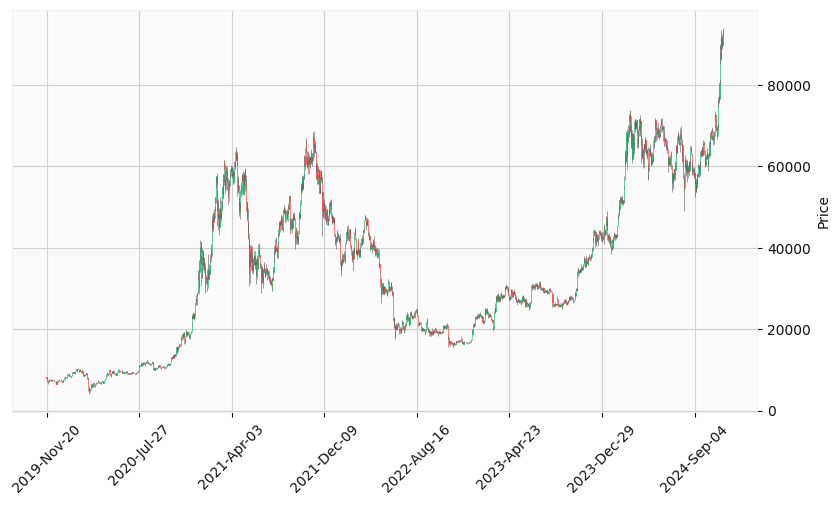

In [135]:
mpf.plot(df, style='yahoo',type='candle',figratio=(18,10))

In [136]:
def Trading_Condition(df):
    # Identify basic candle types
    df['Bullish Candle Now'] = df['Close'] > df['Open']
    df['Bearish Candle Now'] = df['Close'] < df['Open']
    df['Bullish Candle'] = df['Close'].shift(1) > df['Open'].shift(1)
    df['Bearish Candle'] = df['Close'].shift(1) < df['Open'].shift(1)
    df['Prev Bullish Candle'] = df['Close'].shift(2) > df['Open'].shift(2)
    df['Prev Bearish Candle'] = df['Close'].shift(2) < df['Open'].shift(2)
    df['Prev_2_Bullish'] = df['Close'].shift(3) > df['Open'].shift(3)
    df['Prev_2_Bearish'] = df['Close'].shift(3) < df['Open'].shift(3)

    # Bullish conditions
    df['Prev_2_Bullish'] = df['Close'].shift(3) > df['Open'].shift(3)
    df['Prev Bullish Candle'] = df['Close'].shift(2) > df['Open'].shift(2)
    df['Bullish Candle'] = df['Close'].shift(1) > df['Open'].shift(1)

    # Bearish conditions
    df['Prev_2_Bearish'] = df['Close'].shift(3) < df['Open'].shift(3)
    df['Prev Bearish Candle'] = df['Close'].shift(2) < df['Open'].shift(2)
    df['Bearish Candle'] = df['Close'].shift(1) < df['Open'].shift(1)

    # Identify the Buy patterns
    df['Bullish Continuous'] = (df['Prev_2_Bullish'] &
                               df['Prev Bullish Candle'] &
                               df['Bullish Candle'])

    # Identify the Sell patterns
    df['Bearish Continuous'] = (df['Prev_2_Bearish'] &
                               df['Prev Bearish Candle'] &
                               df['Bearish Candle'])

    df['Bullish Continuous Profit'] = (df['Prev_2_Bullish'] &
                                      df['Prev Bullish Candle'] &
                                      df['Bullish Candle'] &
                                      df['Bullish Candle Now'])

    df['Bearish Continuous Profit'] = (df['Prev_2_Bearish'] &
                                      df['Prev Bearish Candle'] &
                                      df['Bearish Candle'] &
                                      df['Bearish Candle Now'] )
    return df

In [137]:
# Apply the function
df_C = Trading_Condition(df)

In [138]:
df_C

,Close,High,Low,Open,Volume,Bullish Candle Now,Bearish Candle Now,Bullish Candle,Bearish Candle,Prev Bullish Candle,Prev Bearish Candle,Prev_2_Bullish,Prev_2_Bearish,Bullish Continuous,Bearish Continuous,Bullish Continuous Profit,Bearish Continuous Profit
Date,,,,,,,,,,,,,,,,,
2019-11-20 00:00:00+00:00,8027.268066,8237.240234,8010.511719,8203.613281,20764300437,False,True,False,False,False,False,False,False,False,False,False,False
2019-11-21 00:00:00+00:00,7642.750000,8110.098145,7597.381836,8023.644531,22514243371,False,True,False,True,False,False,False,False,False,False,False,False
2019-11-22 00:00:00+00:00,7296.577637,7697.382812,6936.706543,7643.569336,34242315785,False,True,False,True,False,True,False,False,False,False,False,False
2019-11-23 00:00:00+00:00,7397.796875,7442.258789,7151.417969,7296.164551,21008924418,True,False,False,True,False,True,False,True,False,True,False,False
2019-11-24 00:00:00+00:00,7047.916992,7408.577148,7029.289062,7398.633789,30433517289,False,True,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-16 00:00:00+00:00,90558.476562,91763.945312,90094.226562,91064.367188,44333192814,False,True,True,False,False,True,True,False,False,False,False,False
2024-11-17 00:00:00+00:00,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,False,True,False,True,True,False,False,True,False,False,False,False
2024-11-18 00:00:00+00:00,90542.640625,92596.789062,89393.593750,89843.718750,75535775084,True,False,False,True,False,True,True,False,False,False,False,False


In [139]:
df_C['Bullish Continuous']

,Bullish Continuous
Date,
2019-11-20 00:00:00+00:00,False
2019-11-21 00:00:00+00:00,False
2019-11-22 00:00:00+00:00,False
2019-11-23 00:00:00+00:00,False
2019-11-24 00:00:00+00:00,False
...,...
2024-11-16 00:00:00+00:00,False
2024-11-17 00:00:00+00:00,False
2024-11-18 00:00:00+00:00,False


In [140]:
df['Bullish Continuous Profit']

,Bullish Continuous Profit
Date,
2019-11-20 00:00:00+00:00,False
2019-11-21 00:00:00+00:00,False
2019-11-22 00:00:00+00:00,False
2019-11-23 00:00:00+00:00,False
2019-11-24 00:00:00+00:00,False
...,...
2024-11-16 00:00:00+00:00,False
2024-11-17 00:00:00+00:00,False
2024-11-18 00:00:00+00:00,False


In [141]:
df_C['Bullish Continuous'].value_counts()

,count
Bullish Continuous,
False,1614
True,214


In [142]:
df['Bullish Continuous Profit'].value_counts()

,count
Bullish Continuous Profit,
False,1717
True,111


In [145]:
winrate_B = 111/214*100
winrate_B

51.86915887850467

In [143]:
df['Bearish Continuous'].value_counts()

,count
Bearish Continuous,
False,1642
True,186


In [144]:
df['Bearish Continuous Profit'].value_counts()

,count
Bearish Continuous Profit,
False,1744
True,84


In [125]:
winrate_S = 53/108*100
winrate_S

49.074074074074076